# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [43]:
df = pd.read_csv("climate_change_data.csv") #putting the downloaded data into a dataframe

df.head() #get a sense of what the data looks like

    

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [22]:
df.columns #print column names


Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [23]:
# Renaming columns for easier comprehension, and also ability to call them later (so we need to eliminate the spaces)
df = df.rename(columns={"CO2 Emissions": "CO2_Emissions", "Sea Level Rise": "Sea_Level_Rise", "Wind Speed": "Wind_Speed"})

In [24]:
df.columns #print column names again to check it's all good

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2_Emissions',
       'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed'],
      dtype='object')

In [25]:
duplicate_rows_df = df[df.duplicated()] # Checking for duplicates
print("Number of duplicated rows: ", duplicate_rows_df.shape)
#there are no duplicates, so we can skip the step of addressing or dropping data

Number of duplicated rows:  (0, 9)


In [26]:
df.shape #check size of dataframe

(10000, 9)

In [27]:
df.dtypes #checking the data types of each column
#this shows me that this dataset is mostly numbers, and they are not necc whole numbers. 
#it also shows me that dates are not encoded as numbers

Date               object
Location           object
Country            object
Temperature       float64
CO2_Emissions     float64
Sea_Level_Rise    float64
Precipitation     float64
Humidity          float64
Wind_Speed        float64
dtype: object

In [28]:
#using value counts as a way to establish how many unique fields are in a column
#this tells me that the data is continuous, and that value counts isn't going to give me the kind of information i really need
Value_Date = df.Date.value_counts()
ValueLocation = df.Location.value_counts()
ValueCountry = df.Country.value_counts()
ValueEmissions = df['CO2_Emissions'].value_counts()
ValueSeaRise = df.Sea_Level_Rise.value_counts()
ValuePrecipitation = df.Precipitation.value_counts()
ValueHumidity = df.Humidity.value_counts()
ValueWindSpeed = df.Wind_Speed.value_counts()

print("Date values: ", Value_Date)
print("Location values: ", ValueLocation) 
print("Country values: ", ValueCountry) 
print("Emissions values: ", ValueEmissions) 
print("Sea Rise values: ", ValueSeaRise)  
print("Precipitation values: ", ValuePrecipitation)
print("Humidity values: ", ValueHumidity)
print("Wind speed values: ", ValueWindSpeed) 


Date values:  2000-01-01 00:00:00.000000000    1
2015-05-05 08:38:53.033303296    1
2015-04-29 11:30:50.225022464    1
2015-04-30 07:40:33.483348288    1
2015-05-01 03:50:16.741674112    1
                                ..
2007-08-31 23:59:59.999999968    1
2007-09-01 20:09:43.258325824    1
2007-09-02 16:19:26.516651648    1
2007-09-03 12:29:09.774977472    1
2022-12-31 00:00:00.000000000    1
Name: Date, Length: 10000, dtype: int64
Location values:  North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: Location, Length: 7764, dtype: int64
Country values:  Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon  

In [29]:
df.mean(axis=0) #getting the mean of each column that has numeric values

C:\Users\19739\AppData\Local\Temp\ipykernel_22504\308820539.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(axis=0) #getting the mean of each column that has numeric values


Temperature        14.936034
CO2_Emissions     400.220469
Sea_Level_Rise     -0.003152
Precipitation      49.881208
Humidity           49.771302
Wind_Speed         25.082066
dtype: float64

In [30]:
df['Temperature'].describe() #getting the mean, count, minimum and maximum values and the standard deviation of each column

#describing the results:
#average temp is 14.94
#25%: This is the first quartile. 25% of the values in this column are less than or equal to 11.58.
#50%: This is the median, or the 50th percentile, right in the middle. The median humidity is approximately 14.98.
#75%: This is the third quartile. 75% of the values in the 'Temperature' column are less than or equal to 18.31. 
#std, or standard deviation - which measures how spread out the values are from the mean - is 5.03. 
#This means that temp values tend to not vary a lot from the actual average - it's a fairly small standard of deviation.

count    10000.000000
mean        14.936034
std          5.030616
min         -3.803589
25%         11.577991
50%         14.981136
75%         18.305826
max         33.976956
Name: Temperature, dtype: float64

In [31]:
df['CO2_Emissions'].describe()

#describing the results:
#average carbon dioxide emissions is 400.22
#25%: 25% of the values in this column are less than or equal to 367.10.
#50%: The median humidity is approximately 400.82.
#75%: 75% of the values in the 'Humidity' column are less than or equal to 433.30. 
#std, or standard deviation - which measures how spread out the values are from the mean - is 49.70. 
#This means that the carbon dioxide values tend to vary a lot from the actual average - it's a VERY large standard of deviation.

count    10000.000000
mean       400.220469
std         49.696933
min        182.131220
25%        367.109330
50%        400.821324
75%        433.307905
max        582.899701
Name: CO2_Emissions, dtype: float64

In [32]:
df['Sea_Level_Rise'].describe()
#describing the results:
#average sea level rise is -0.003
#25%: 25% of the values in this column are less than or equal to  -0.67.
#50%: The median sea level rise is 0.002.
#75%: 75% of the values in the 'sea level rise' column are less than or equal to 0.675 
#std standard deviation is 0.99 
#This means that sea level values vary very little from the mean.

count    10000.000000
mean        -0.003152
std          0.991349
min         -4.092155
25%         -0.673809
50%          0.002332
75%          0.675723
max          4.116559
Name: Sea_Level_Rise, dtype: float64

In [33]:
df['Precipitation'].describe()
#describing the results:
#average precipitation is 49.88
#25%: 25% of the values in this column are less than or equal to 24.713.
#50%: The median precipitation is approximately 49.82.
#75%: 75% of the values in the 'precipitation' column are less than or equal to 74.52. 
#std standard deviation from the mean is 28.86. 
#This means that precipation values tend to vary a lot from the actual average - it's a large standard of deviation.

count    10000.000000
mean        49.881208
std         28.862417
min          0.010143
25%         24.497516
50%         49.818967
75%         74.524991
max         99.991900
Name: Precipitation, dtype: float64

In [34]:
df['Humidity'].describe()
#describing the results:
#average humidity is 49.77
#25%: This is the first quartile. 25% of the values in this column are less than or equal to 24.713.
#50%: This is the median, or the 50th percentile, right in the middle. The median humidity is approximately 49.68.
#75%: This is the third quartile. 75% of the values in the 'Humidity' column are less than or equal to 75.206. 
#std, or standard deviation, is 28.93. 
#This means that humidity values tend to vary a lot from the actual average - it's a large standard of deviation.

count    10000.000000
mean        49.771302
std         28.929320
min          0.018998
25%         24.713250
50%         49.678412
75%         75.206390
max         99.959665
Name: Humidity, dtype: float64

In [38]:
df['Wind_Speed'].describe()
#describing the results:
#average wind speed is 25.08
#25%: 25% of the wind speed values in this column are less than or equal to 12.54. 
#50%: The median is approximately 24.91.
#75%: 75% of the wind speed values in this column are less than or equal to 37.67. 
#std standard deviation - is 14.47. that is only some variability 

count    10000.000000
mean        25.082066
std         14.466648
min          0.001732
25%         12.539733
50%         24.910787
75%         37.670260
max         49.997664
Name: Wind_Speed, dtype: float64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

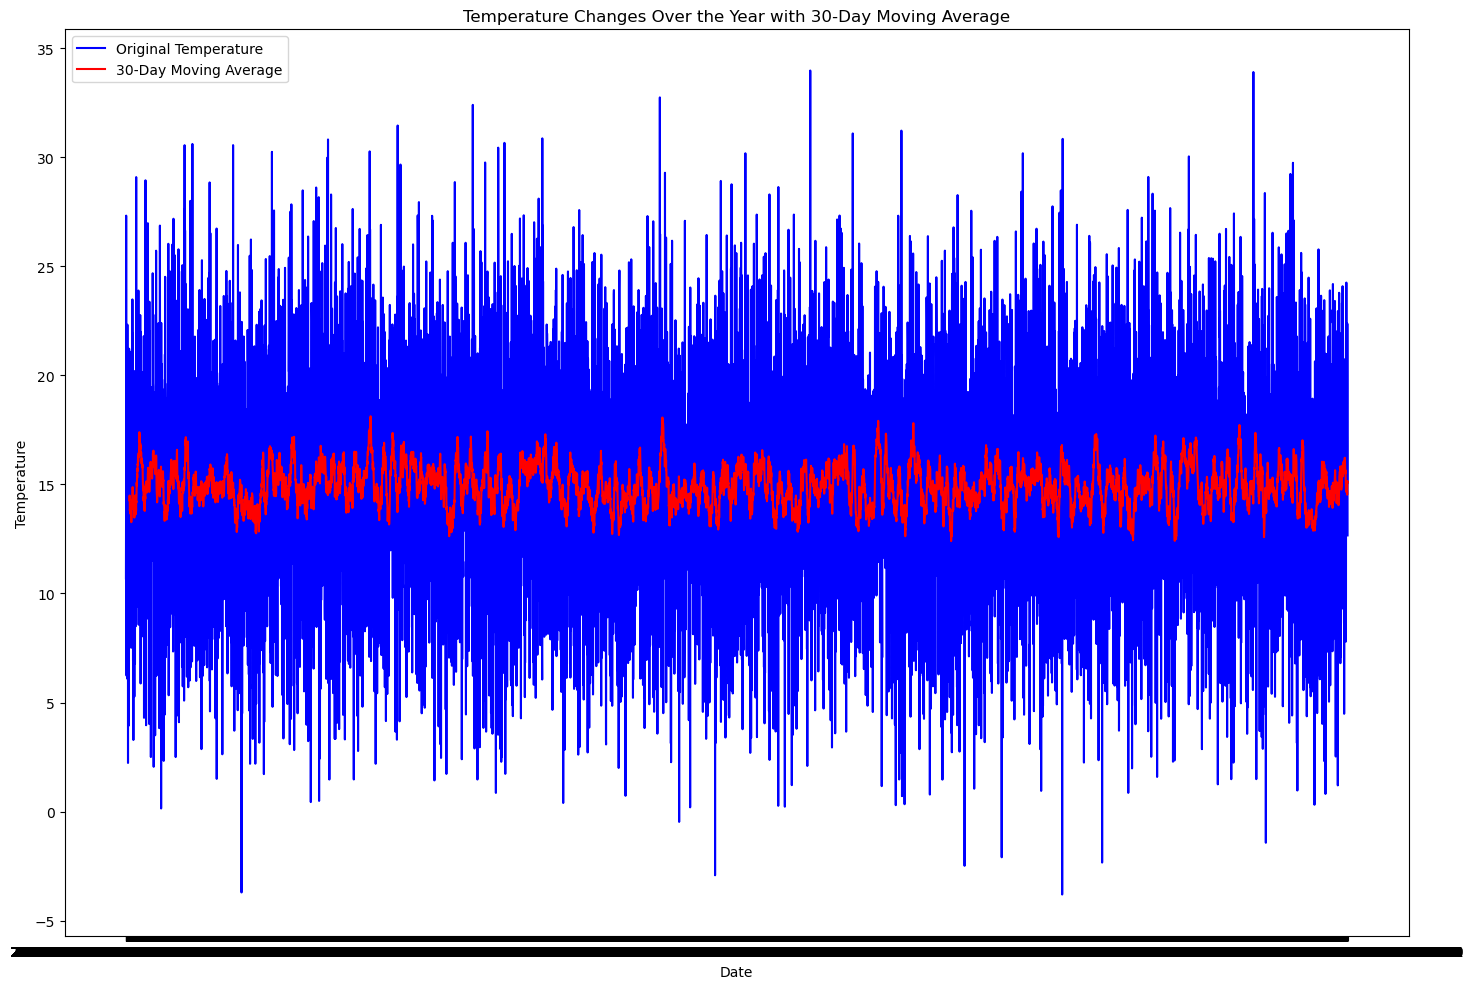

In [50]:
# Temperature changes over the year. I used a line chart so we can see the fluctuations over time more clearly.
#I used a 30 day rolling average to try to smooth out the data so it doesn't look so messy


df['Temperature_MA30'] = df['Temperature'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(df['Date'], df['Temperature'], color='blue', label='Original Temperature')
ax.plot(df['Date'], df['Temperature_MA30'], color='red', label='30-Day Moving Average')

ax.set_title('Temperature Changes Over the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend()  # Display legend

plt.tight_layout()
plt.show()




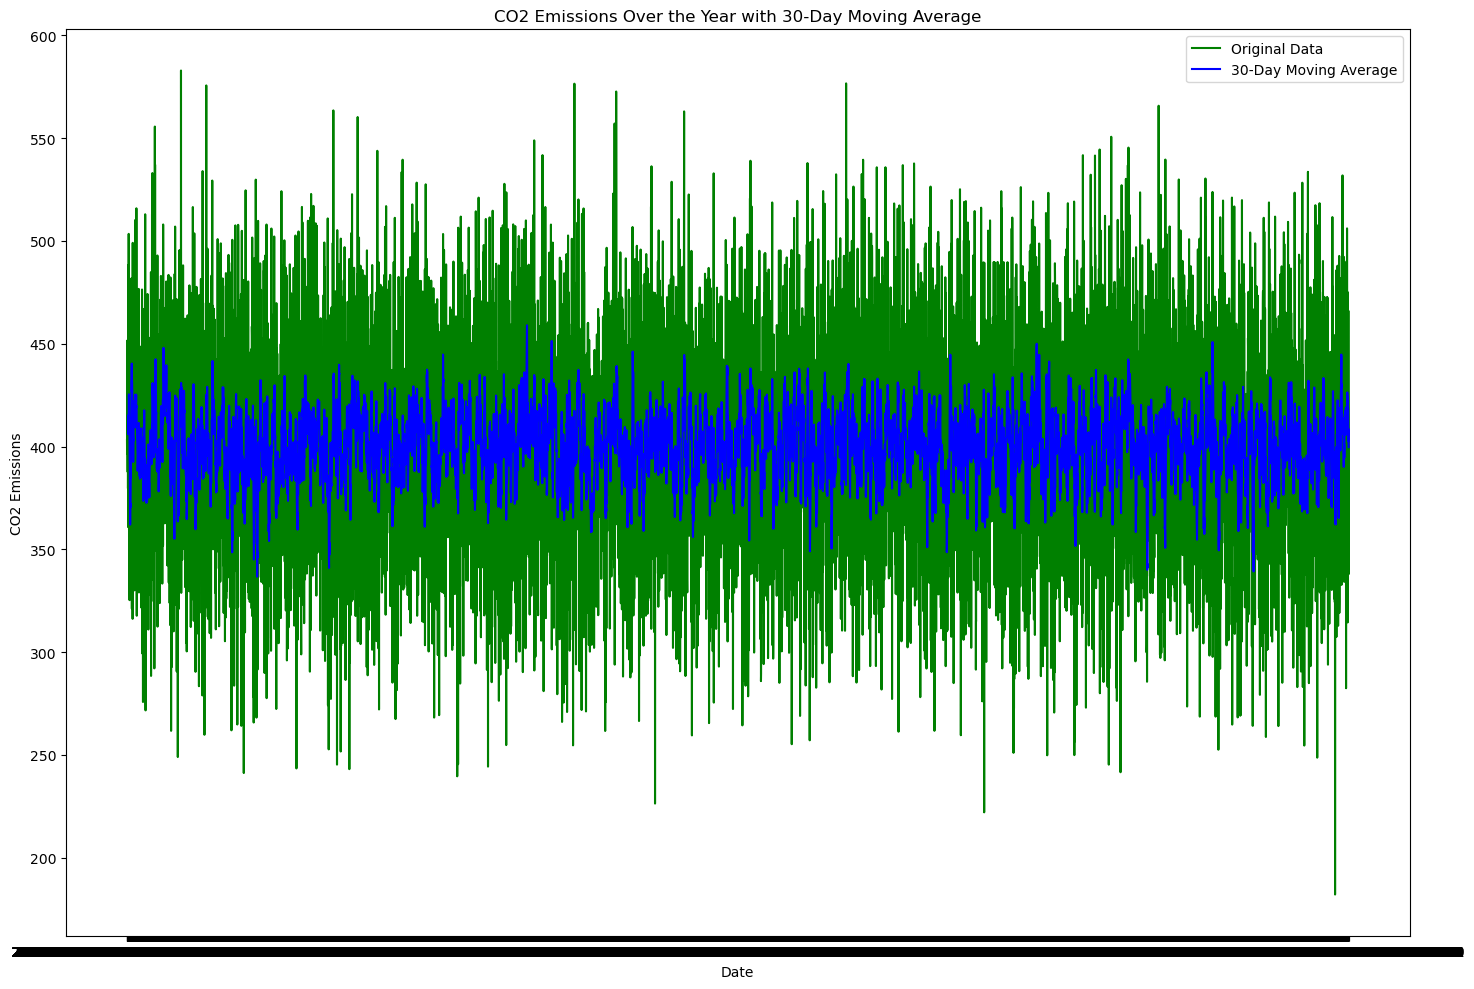

In [51]:
# CO2 Emissions over the year. I used a line chart so we can see the fluctuations over time more clearly.


df['CO2 Emissions_MA30'] = df['CO2 Emissions'].rolling(window=30).mean()
fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(df['Date'], df['CO2 Emissions'], color='green', label='Original Data')


ax.plot(df['Date'], df['CO2 Emissions_MA10'], color='blue', label='30-Day Moving Average')

ax.set_title('CO2 Emissions Over the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Emissions')
ax.legend() 

plt.tight_layout()
plt.show()



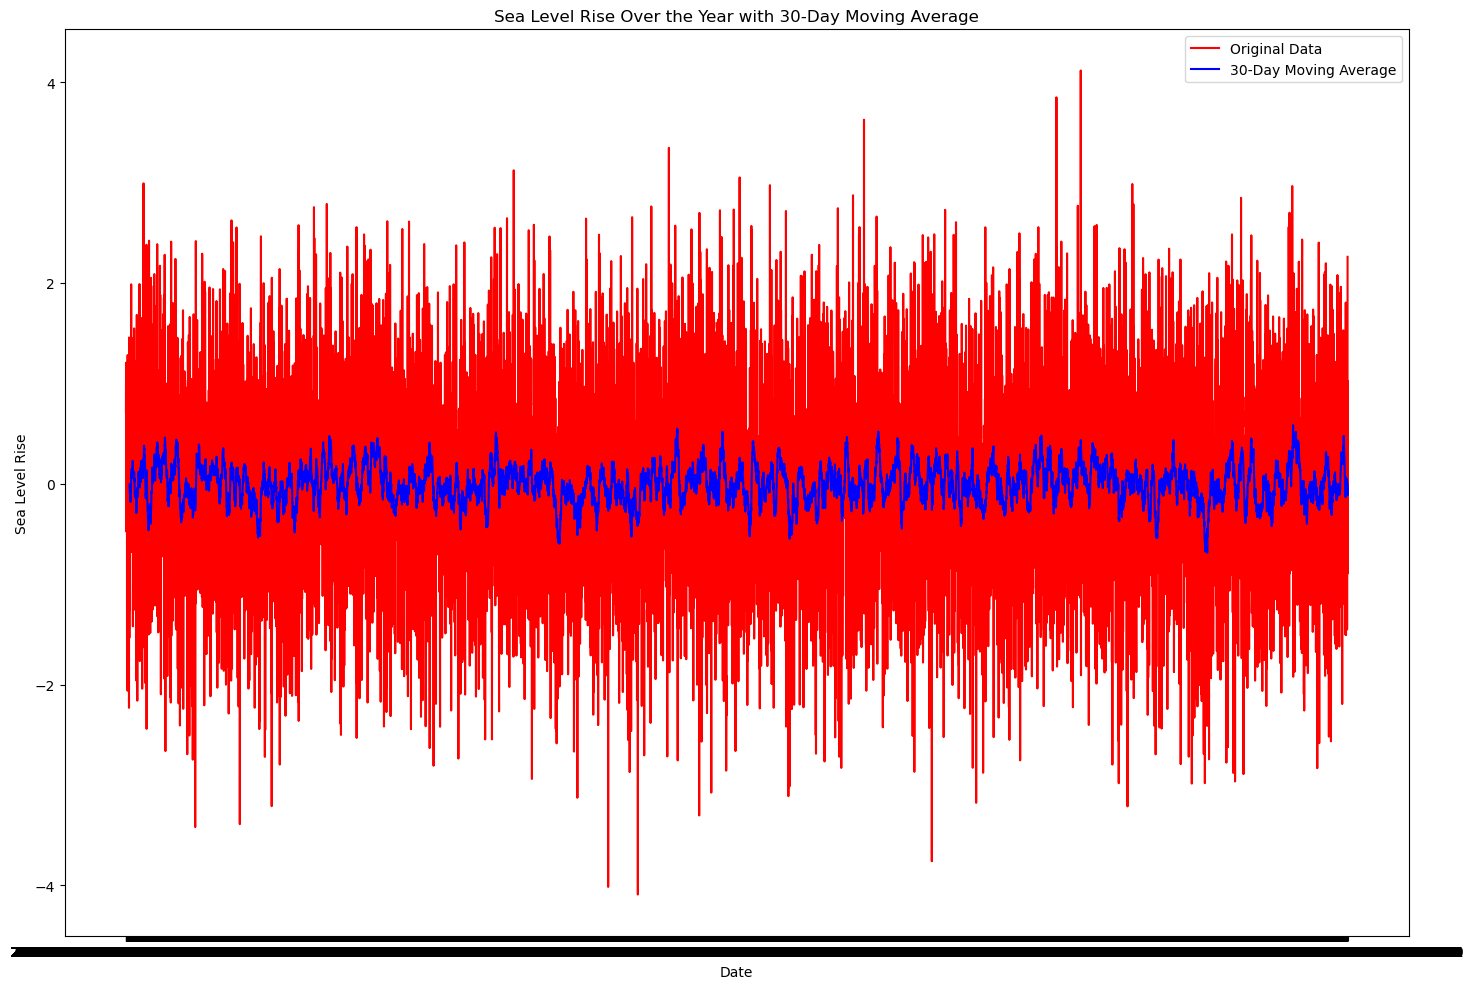

In [55]:
# Sea Level Rise over the year. I used a line chart so we can see the fluctuations over time more clearly.


df['Sea_Level_Rise_MA30'] = df['Sea Level Rise'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df['Date'], df['Sea Level Rise'], color='red', label='Original Data')
ax.plot(df['Date'], df['Sea_Level_Rise_MA30'], color='blue', label='30-Day Moving Average')
ax.set_title('Sea Level Rise Over the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Sea Level Rise')
ax.legend()

plt.tight_layout()
plt.show()



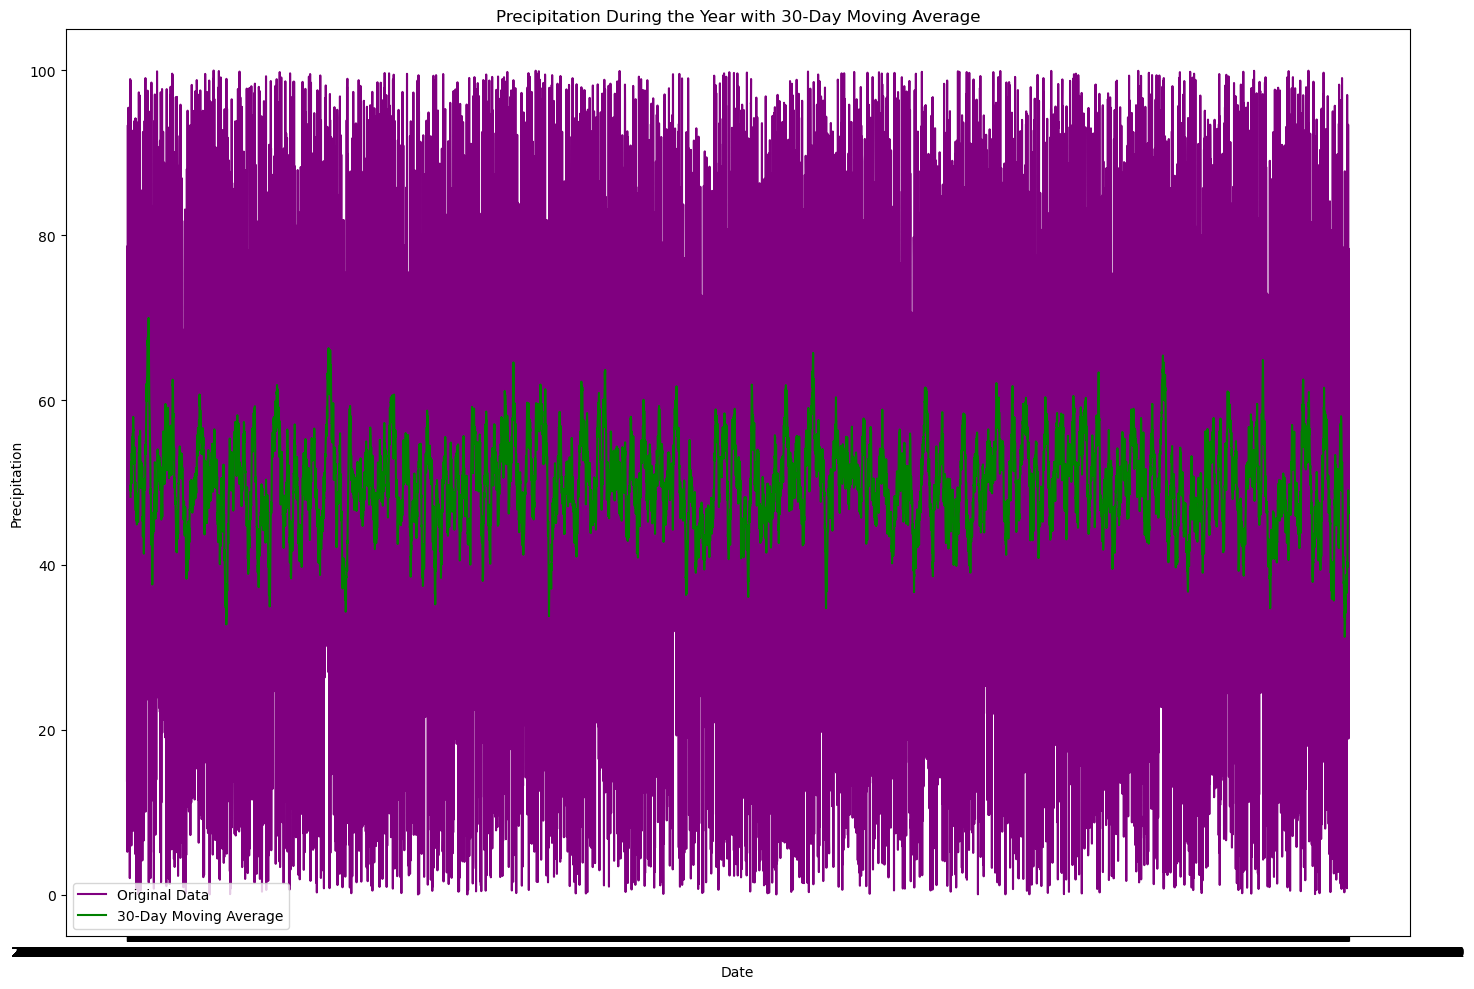

In [60]:
# Precipitation over the year. I used a line chart so we can see the fluctuations over time more clearly.


df['Precipitation_MA30'] = df['Precipitation'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df['Date'], df['Precipitation'], color='purple', label='Original Data')
ax.plot(df['Date'], df['Precipitation_MA30'], color='green', label='30-Day Moving Average')
ax.set_title('Precipitation During the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.legend()

plt.tight_layout()
plt.show()



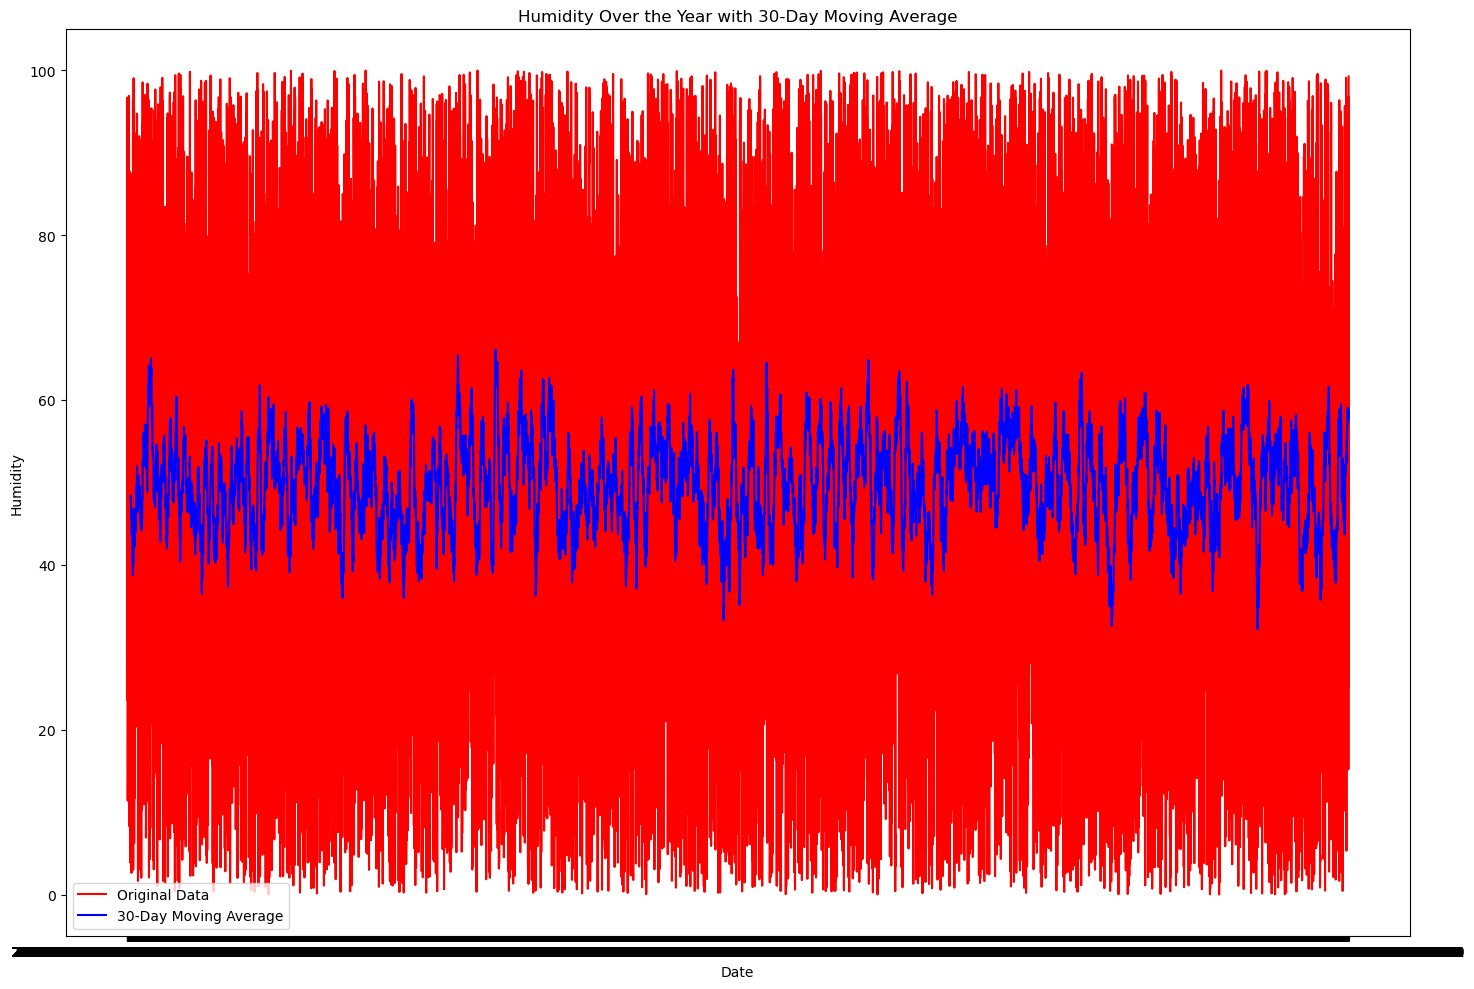

In [57]:
# Humidity over the year. I used a line chart so we can see the fluctuations over time more clearly.

df['Humidity_MA30'] = df['Humidity'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df['Date'], df['Humidity'], color='red', label='Original Data')
ax.plot(df['Date'], df['Humidity_MA30'], color='blue', label='30-Day Moving Average')
ax.set_title('Humidity Over the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
ax.legend()

plt.tight_layout()
plt.show()

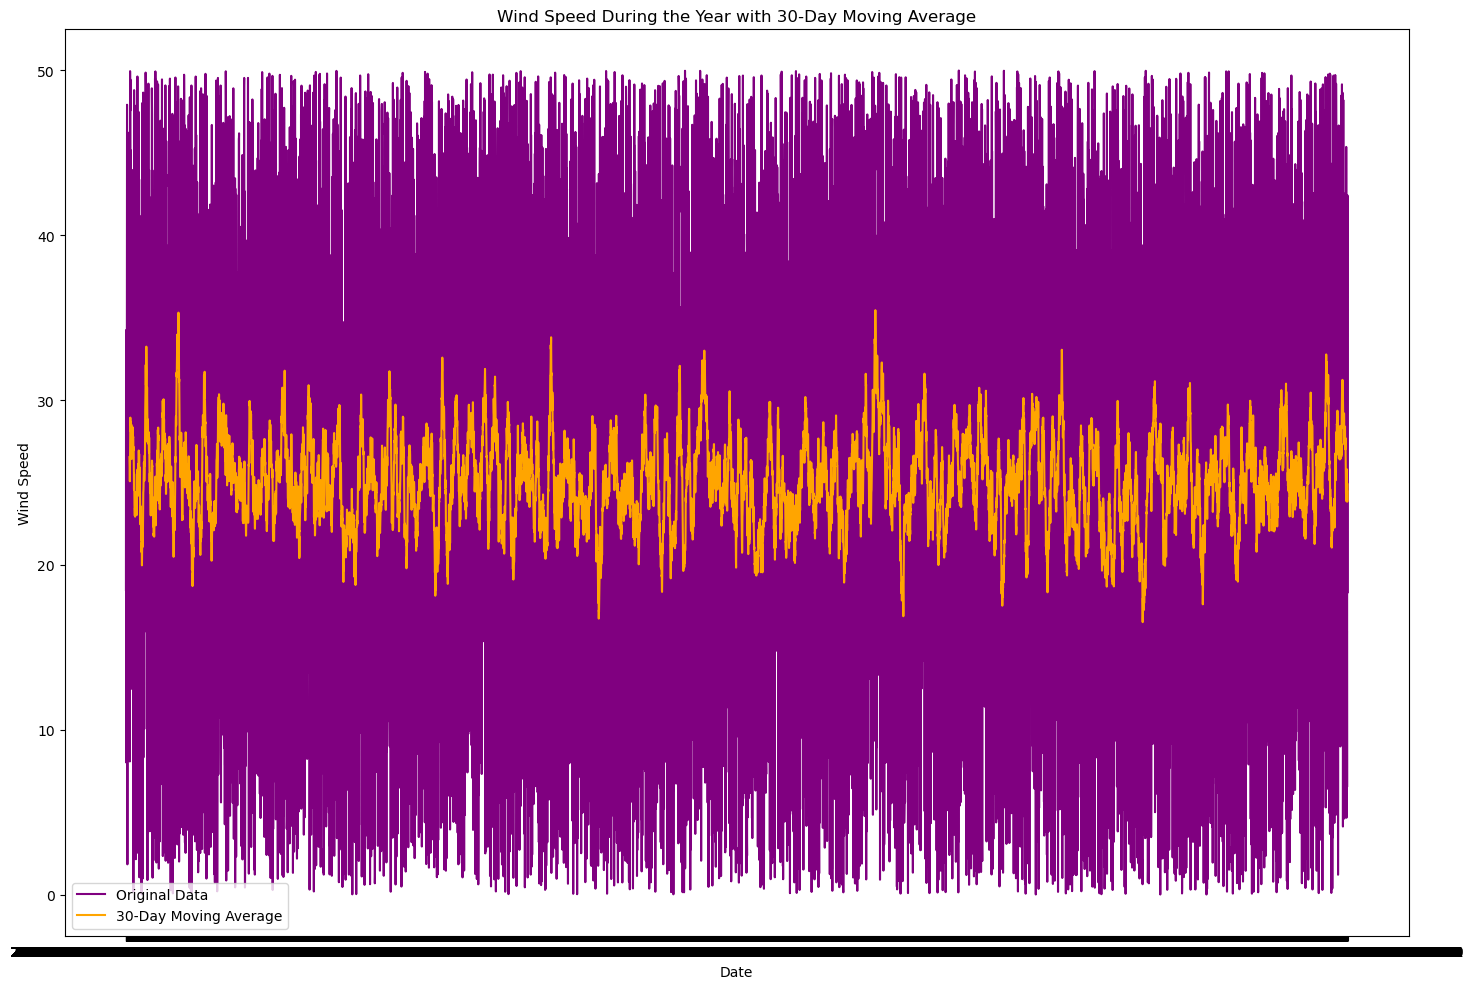

In [64]:
# Wind Speed over the year. I used a line chart so we can see the fluctuations over time more clearly.

df['Wind_Speed_MA30'] = df['Wind Speed'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df['Date'], df['Wind Speed'], color='purple', label='Original Data')
ax.plot(df['Date'], df['Wind_Speed_MA30'], color='orange', label='30-Day Moving Average')
ax.set_title('Wind Speed During the Year with 30-Day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
ax.legend()

plt.tight_layout()
plt.show()



In [62]:
print(df.columns)


Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed',
       'CO2 Emissions_MA10', 'CO2 Emissions_MA30', 'Temperature_MA30',
       'Sea_Level_Rise_MA30', 'Humidity_MA30', 'Wind Speed_MA30',
       'Precipitation_MA30'],
      dtype='object')


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
Yes - I was suprised to see that the sea level actually dropped that year, instead of rose. Also, the sea level measurements had a very small standard of deviation from the mean. The temperature average also had a small standard of deviation, which also surprised me!
2. Do you have any concerns about your dataset? 
I am unsure how to split up the data to look at the average changes relative to geography or city so I can calculate something other than the global average. Right now the charts are pretty hard to read and understand at a glance, which is not what I want.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
There doesn't seem to be duplicates or empty entries, which is my biggest concern, and I am unsure what there is that needs to be cleaned before I do the transformation step.